<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/23.00-Cenario_Rio_Empresas.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- Construção de cenários: definindo as idades](22.00-Construindo_Cenarios_Distribuicao_Idades.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [O cenário da cidade do Rio de Janeiro: rede escolar ->](24.00-Cenario_Rio_Escolar.ipynb)

---


# Workplace Network

In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np
from scipy import stats

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
%cd ..
import episiming

/home/gil/repos/episiming


In [3]:
sns.set_style("darkgrid")

In [4]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 24/Oct/2020


## Population Distribution for the City of Rio de Janeiro

As an example we will use the data for the City of Rio de Janeiro

- We generated the positions for residences and its residents according to data from [Landscan](https://landscan.ornl.gov) and residential census.

- We generated the individuals ages.

### Loading population distribution from Landscan

We load population data by square kilometer for the City of Rio de Janeiro, pulled from [Landscan](https://landscan.ornl.gov), changing cells values from -1 to 0.

In [7]:
landscan_rio = np.load(os.path.join('input', 'dados_rio',
                                    'landscan_rio_paqueta.npy')).astype(int)
landscan_rio = np.maximum(landscan_rio, 0)
landscan_rio_xscale = 0.85239
landscan_rio_yscale = 0.926
landscan_rio_ydim, landscan_rio_xdim = landscan_rio.shape
landscan_rio_xextent = landscan_rio_xdim*landscan_rio_xscale
landscan_rio_yextent = landscan_rio_ydim*landscan_rio_yscale

print(f'Dimensão da matriz de blocos: {landscan_rio.shape}')
print('Região representada pelo LandScan: ',
      f'{landscan_rio_xextent:.3f} x {landscan_rio_yextent:.3f} km^2')
print(f'Total de blocos: {landscan_rio_xdim*landscan_rio_ydim}')
print(f'Total de blocos habitados: {len(landscan_rio[landscan_rio>0])}')
print(f'População: {landscan_rio.sum()}')

Dimensão da matriz de blocos: (39, 83)
Região representada pelo LandScan:  70.748 x 36.114 km^2
Total de blocos: 3237
Total de blocos habitados: 1473
População: 6860819


### Rescaling the scenario

To make tests faster, with smaller populations, we divided the heatmap matrix by a scaling factor.

This division gives us results in floating point and we cast as `integer` type. This will reduce even more the population on each block, but will preserve the proportions between different blocks.

In [5]:
%%time
rio = episiming.scenes.RiodeJaneiro(1/)

CPU times: user 3.61 s, sys: 67.4 ms, total: 3.68 s
Wall time: 3.7 s


In [ ]:
wp.eap_fractions = episiming.scenes.functions.get_age_fractions(self.eap_ages, self.eap_ratio_ages, age_max=110)

In [28]:
wp.quantifica_empresas_por_tamanho(num_pop, eap_num, tam_min, tam_max, z3_a, z3_c, verbose = True)

Total da população: 1371566
Total da força de trabalho (PEA): 670009
Número de tamanhos de empresas: 159
Número de empresas: 98092
Tamanhos de empresas: de 2 a 160
Número de indivíduos nas empresas (PEA ocupados): 537727
Média de indivíduos por empresa: 5.481863964441545
Porcentagem de indivíduos da força de trabalho nas empresas: 80.3%
Distribuição do número de empresas por tamanho: 
[36583 18629 11038  7160  4940  3567  2666  2049  1611  1291  1052   869
   726   613   523   450   390   340   298   263   234   208   187   168
   151   137   125   113   104    95    87    80    74    69    64    59
    55    51    48    45    42    39    37    35    33    31    29    27
    26    24    23    22    21    20    19    18    17    16    15    15
    14    13    13    12    12    11    11    10    10     9     9     9
     8     8     8     7     7     7     7     6     6     6     6     6
     5     5     5     5     5     4     4     4     4     4     4     4
     4     3     3     3    

(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160]),
 array([36583, 18629, 11038,  7160,  4940,  3567,  2666,  2049,  1611,
         1291,  1052,   869,

670009

In [9]:
pop_block = (landscan_rio*rio.scale).astype(int)
num_pop = pop_block.sum()

### Visualizing populational distribution

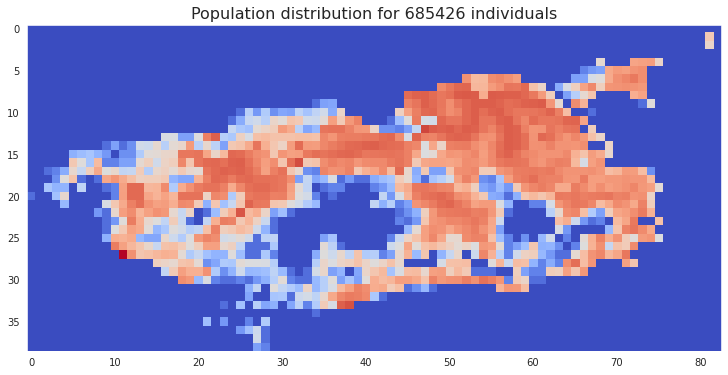

In [10]:
plt.figure(figsize=(16,6))
plt.imshow(np.log(1 + pop_block), cmap='coolwarm', interpolation='none')
plt.grid(False)
plt.title(f'Population distribution for {num_pop} individuals', fontsize=16)
plt.show()

## Housing Network

We generate housing network as in #Colocar aqui ref para rede residencial#

From the Housing Network, we will only need the location of the individuals to construct the Workplace Network.

---

# redundante
### Censo residencial

Para fazer a distribuição das residências, precisamos de um "censo residencial", indicando as frações da população habitando residências de diferentes tamanhos.

Utilizaremos os seguintes valores, onde "Tamanho" é o tamanho da residência em número de residentes e "Porcentagem" é a porcentagem da população em residências do tamanho correspondente:

| Tamanho  | Porcentagem |
| --- | --- |
| 1 | 21% |
| 2 | 26% |
| 3 | 20% |
| 4 | 17% |
| 5 | 8% |
| 6 | 4% |
| 7 | 2% |
| 8 | 2% |


In [11]:
censo_residencial = np.array([.21, .26, .20, .17, .08, .04, .02, .02])
num_tam_res = len(censo_residencial) # tamanho máximo para as residências

### Visualização do censo residencial

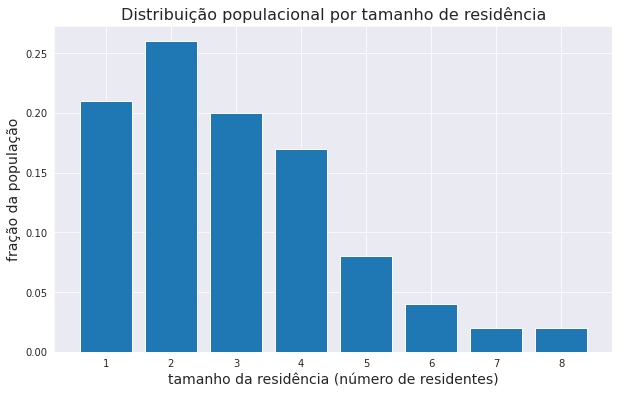

In [12]:
plt.figure(figsize=(10,6))
bar_width = 0.8
r1 = [j for j in range(1,num_tam_res+1)]
plt.bar(r1, censo_residencial, width=bar_width)
plt.xlabel('tamanho da residência (número de residentes)', fontsize=14)
plt.ylabel('fração da população', fontsize=14)
plt.title(f'Distribuição populacional por tamanho de residência', fontsize=16)
plt.show()  

### Distribuindo e alocando os indivíduos e as suas residências

Aqui, usamos a função `episiming.cenarios.aloca_residencias_e_individuos()` discutida anteriormente.

In [13]:
%%time
pos_residencias, pos_individuos, res_individuos, pop_blocos_indices \
    = rio.res_pos, rio.pop_pos, rio.res_pop, rio.bl_pop

CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 18.1 µs


### Gerando o grafo da rede residencial

### Viualização

## Definindo a idade dos indivíduos

Aqui, utilizamos a função criada a partir das discussões nas últimas notas.

### Pirâmide etária

Primeiro, precisamos de tabelas para a pirâmide etária.

# fim redundancia
---

In [15]:
pop_max = len(rio.pop_pos)

In [16]:
num_pop

685426

In [17]:
num_pop = pop_max

## Workplace Network

To construct the Workplace Network, we follow these steps:

- We distribute the number of workplaces by their size, following a distribution similar to the [Zipf Law](https://en.wikipedia.org/wiki/Zipf%27s_law), with parameters chosen according the total size of the population and maximum size of the workplaces.

- We distribute the workplaces in the blocks, with weights according to the population of each block.

- We allocate the individuals in each workplace, considering a medium work-to-house distance.

### Workplace distribution by size, according to the Brazilian Institute of Geography and Statistics (IBGE) Census

In the IBGE website [Companies Statistics ](https://cidades.ibge.gov.br/brasil/rj/rio-de-janeiro/pesquisa/19/0?indicador=29761) we find the following data for the City of Rio de Janeiro:

| Number of active individuals | Number of companies | Mean workers per company |
| --- | --- | --- |
| 2,566,694 | 195,110 | 13.15 |

The webpage also gives us the number of salaried individuals (2,269,964) and the number of workplaces (209,237).

> Olhar sobre essa pesquisa, mas também ser capaz de gerar o cenário com apenas o numero de empresas

> Uma pesquisa melhor é necessária para esclarecer os dados e, ainda, para ver se conseguimos detalhes sobre a distribuição espacial das empresas.

### Attributing the workplaces sizes via power law

As we lack information for the size of workplaces, we will distribute the number of workplaces per size according to a power law, as done by `The Imperial College Group/Pitt`.

We are going to use the same power law, which is a function of three parameters, similar to the [Zipf Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

#### Zipf power law with three parameters

- Here is the power law used for the distribution of the density of workers per workplace:

$$ \mathcal{P}(n > k) = f_3(k; a, c, k_\textrm{max}) 
= \frac{\displaystyle \left(\frac{\displaystyle 1 + \frac{k_\textrm{max}}{a}}{\displaystyle 1 + \frac{k}{a}}\right)^c - 1}{\displaystyle \left( 1 + \frac{k}{a}\right)^c -1}, \qquad 0 \leq k \leq k_\textrm{max}
$$

- For Thailand, the parameters are $a = 3.26$, $c=0.97$ and $k_\textrm{max} = 2870$.

- For The USA and Great Britain, we have $a = 5.36$, $c=1.34$ and $k_\textrm{max} = 5920$.

- We highlight that, according to the [supplementary notes from Ferguson et al (2006)](#Referências),

    > US workplaces obey a power law distribution for the number of employees. However, as the model incorporates workplaces rather than firms, we used establishment size data... Independent data were not available for UK establishments, so US parameters were assumed.

- Para o Rio de Janeiro ???

### Active Population

- IBGE considers the **active population (AP)** as being the population from 16 years old on.

In [106]:
num_pop = len(rio.pop_pos)

In [107]:
rng = np.arange(0,num_pop)
ap_pop = rng[rio.pop_age >= 16]
ap_num = len(ap_pop)
print(f'Total Population: {num_pop}')
print(f'Economically active population: {ap_num}')
print(f'Percentage of economically active population: {100*ap_num/num_pop:.1f}%')

Total Population: 685426
Economically active population: 542254
Percentage of economically active population: 79.1%


### Economically Active Population
Verificar Link
- IBGE also considers the **economically active population (EAP)** as the population effectively working or looking for a job.

- According to [2010 Census](http://www.google.com), the EAP of Rio de Janeiro included 48.85 % of the total population.

- We will consider the same proportion.

### Age distribution of EAP

- This distribution is non uniform on age:

    - A considerable amount of 16 and 17 years-old teenages are at school.
    
    - Some amount of people between 18-22 years-old are pursuing higher degrees.
    
    - A great amount of people aged more than 60 years-old is retired or, somehow, not working.
    
    - Adults around their 30s may have the highest unemployment rates.
    
- We take this in consideration by using different weights to select EAP individuals.

### Census data about EAP by age

- From 2010 Census about EAP on the City of Rio de Janeiro, we get the following data:

| Age | EAP |
| --- | --- |
| 16 to 29 | 902115 |
| 30 to 49 | 1488515 |
| 50 to 59 | 495289 |
| 60 + | 241619 |

- As we are not working with population data from 2010, we will use the above data as a distribution by age fraction:

| Age | EAP |
| --- | --- |
| 0 to 15 | 0% |
| 16 to 29 | 29% |
| 30 to 49 | 47% |
| 50 to 59 | 16% |
| 60 + | 8% |

In [109]:
num_pop = len(rio.pop_age)

In [110]:
eap_num, ap_num

(334830, 542254)

In [111]:
eap_num_2010 = np.array([0, 902115, 1448515, 495289, 241619])
eap_ratio = 0.4885
eap_num = int(eap_ratio * num_pop)
eap_ages = np.array([0, 16, 30, 50, 60])
eap_ratio_ages = eap_num_2010/eap_num_2010.sum()
print(f'Testing EAP ratio sum: {sum(eap_ratio_ages)}')
print(f'EAP: {eap_num}')
print(f'EAP age distribution ratio: {eap_ratio_ages}')
print(f'EAP age distribution: {np.around(eap_num*eap_ratio_ages).astype(int)}')

Testing EAP ratio sum: 1.0
EAP: 334830
EAP age distribution ratio: [0.         0.2921794  0.46914888 0.16041552 0.0782562 ]
EAP age distribution: [     0  97830 157085  53712  26203]


In [22]:
# wp = episiming.scenes.work.Workplace(rio.scale, rio.pop_matrix, rio.pop_age, rio.bl_pop, rio.num_pop, eap_num, eap_ages, eap_ratio_ages, 2, 1000, 5.2, 1.5, 3, 4)

In [23]:
# wp.eap_fractions = episiming.scenes.functions.get_age_fractions(eap_ages, eap_ratio_ages, age_max=110)

In [24]:
# wp.quantifica_empresas_por_tamanho()

In [25]:
# wp = episiming.scenes.work.Workplace(rio.scale, rio.pop_matrix, rio.pop_age, rio.bl_pop, rio.num_pop, eap_num, eap_ages, eap_ratio_ages, 2, 1000, 5.2, 1.5, 3, 4)

### Interpolando/extrapolando frações

# Falta função que interpola idades

In [112]:
eap_fractions = episiming.scenes.functions.get_age_fractions(eap_ages, eap_ratio_ages, age_max=110)

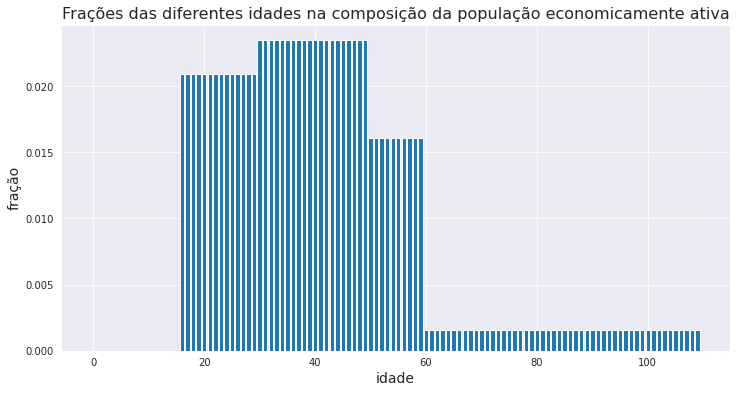

In [113]:
plt.figure(figsize=(12,6))
plt.bar(range(110), eap_fractions)
plt.xlabel('idade', fontsize=14)
plt.ylabel('fração', fontsize=14)
plt.title('Frações das diferentes idades na composição da população economicamente ativa', fontsize=16)
plt.show()

### Antigo:

In [114]:
ap_age_groups = np.array([0, 16, 18, 22, 25, 35, 50, 60, 80])
ap_age_groups_fractions = np.array([0.0, 0.04, 0.10, 0.16, 0.28, 0.23, 0.14, 0.05, 0])
print(ap_age_groups_fractions.sum())

1.0


In [115]:
pea_idades_grupos = np.array([0, 16, 18, 23, 50, 70, 110])
pea_idades_fator_grupos = np.array([0, 0.2, 0.75, 0.85, 0.75, 0.15, 0])

In [116]:
pea_idades_fator = list()
for j in range(len(pea_idades_grupos)-1):
    pea_idades_fator += (pea_idades_grupos[j+1] - pea_idades_grupos[j]) \
        * [pea_idades_fator_grupos[j]]

pea_idades_fracoes = pea_idades_fator * rio.age_fractions
num_pop_emp = int(num_pop * pea_idades_fracoes.sum())

print(f'População total: {num_pop}')
print(f'População economicamente ativa: {num_pop_emp}')
print(f'Porcentagem da população que está economicamente ativa: {100*pea_idades_fracoes.sum():.1f}%')

População total: 685426
População economicamente ativa: 394521
Porcentagem da população que está economicamente ativa: 57.6%


### Visualizando a população economicamente ativa em cada ano de vida

A visualização abaixo é baseada nos dados do censo.

Mais pra frente, faremos a visualização com os dados obtidos pelo código.

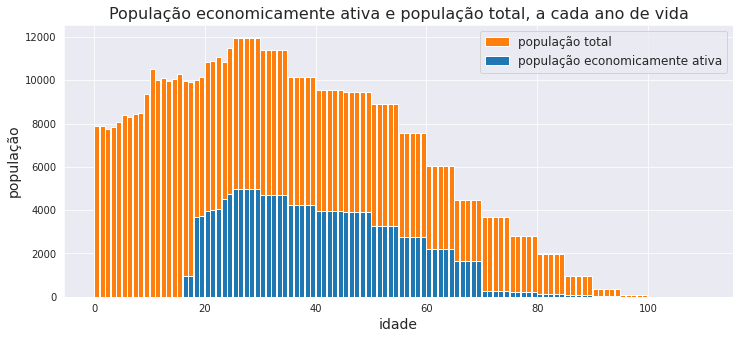

In [117]:
plt.figure(figsize=(12,5))
plt.bar(range(110), num_pop*rio.age_fractions,
        width=0.9, align = 'edge', color='tab:orange', label='população total')
plt.bar(range(110), eap_num*pea_idades_fracoes,
        width=0.9, align = 'edge', color='tab:blue', label='população economicamente ativa')
#plt.hist(pop_idades, bins = list(range(idade_max+1)), color='tab:blue', label='população total')
#plt.hist(pop_idades, bins = list(range(idade_max+1)), color='tab:blue', label='população total')
plt.xlabel('idade', fontsize=14)
plt.ylabel('população', fontsize=14)
plt.title(f'População economicamente ativa e população total, a cada ano de vida', fontsize=16)
plt.legend(fontsize=12)
plt.show()

### Contabilizando as empresas

#### Função de distribuição do número de empresas e trabalhadores por tamanho

In [32]:
def zipf3_acum(a, c, k_max, k):
    '''
    retorna a fração de indivíduos em empresas de tamanho maior que k.
    '''
    return (((1.0 + k_max/a)/(1.0 + k/a))**c - 1)/((1 + k_max/a)**c - 1.0)

def zipf3(a, c, k_max, k):
    '''
    retorna a fração de individuos em empresas de tamanho igual a k.
    '''
    return zipf3_acum(a, c, k_max, k-1) - zipf3_acum(a, c, k_max, k)

def zipf3e(a, c, k_max, k):
    '''
    retorna a fração de empresas de tamanho igual a k.
    '''
    return zipf3(a, c, k_max, k)/k

#### Parâmetros

In [118]:
tam_min = 2
tam_max = 1000
z3_a = 5.1
z3_c = 0.9
z3_max = 2*tam_max

#### Distribuição

In [119]:
tam_z3 = np.arange(tam_min, tam_max+1)
pop_z3 = zipf3(z3_a, z3_c, z3_max, tam_z3)
emp_z3 = zipf3e(z3_a, z3_c, z3_max, tam_z3)

In [120]:
print(zipf3_acum(z3_a, z3_c, z3_max, 0))
print(zipf3e(z3_a, z3_c, z3_max, 1))
print(zipf3(z3_a, z3_c, z3_max, 1))
print(zipf3e(z3_a, z3_c, z3_max, 2))
print(zipf3(z3_a, z3_c, z3_max, 2))

1.0
0.14952118614563326
0.14952118614563326
0.054600917069500765
0.10920183413900153


### Visualização

In [36]:
import scipy.integrate

In [37]:
tam_z3[-1]

1000

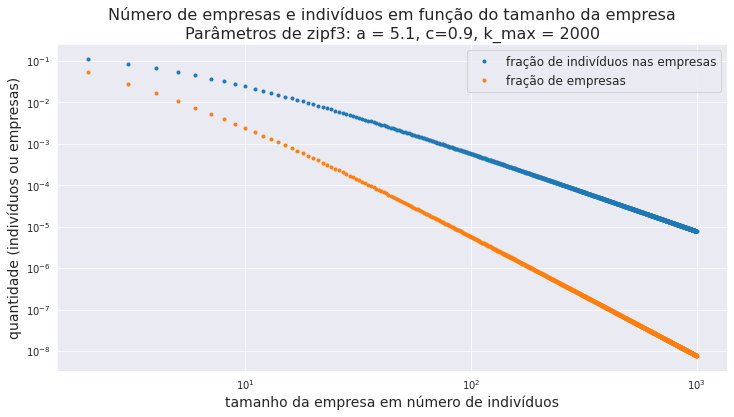

In [38]:
plt.figure(figsize=(12,6))
plt.plot(tam_z3, pop_z3, 'o', ms=3, label='fração de indivíduos nas empresas')
plt.plot(tam_z3, emp_z3, 'o', ms=3, label='fração de empresas')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.xlabel('tamanho da empresa em número de indivíduos', fontsize=14)
plt.ylabel('quantidade (indivíduos ou empresas)', fontsize=14)
plt.title('Número de empresas e indivíduos em função do tamanho da empresa\n'
          + f'Parâmetros de zipf3: a = {z3_a}, c={z3_c}, k_max = {z3_max}', fontsize=16)
plt.show()

In [121]:
def quantifica_empresas_por_tamanho(num_pop, num_pea, tam_min, tam_max, z3_a, z3_c, verbose=False):

    emp_tam_z3 = np.arange(tam_min, 2*tam_max)
    emp_num_z3 = (num_pea*zipf3e(z3_a, z3_c, 2*tam_max, emp_tam_z3)).astype(int)
    emp_num_z3 = emp_num_z3[emp_num_z3>0]
    emp_tam_z3 = np.array(list(range(tam_min, tam_min + len(emp_num_z3))))
    emp_pop_z3 = np.array([(tam_min + k)*emp_num_z3[k] for k in range(len(emp_num_z3))])

    if not len(emp_tam_z3):
        print('Não foi possível distribuir as empresas, tente com outros parâmetros')
    elif verbose:
        print(f'Total da população: {num_pop}')
        print(f'Total da força de trabalho (PEA): {num_pea}')
        print(f'Número de tamanhos de empresas: {len(emp_num_z3)}')
        print(f'Número de empresas: {emp_num_z3.sum()}')
        print(f'Tamanhos de empresas: de {emp_tam_z3.min()} a {emp_tam_z3.max()}')
        print(f'Número de indivíduos nas empresas (PEA ocupados): {emp_pop_z3.sum()}')
        print(f'Média de indivíduos por empresa: {emp_pop_z3.sum()/emp_num_z3.sum()}')
        print('Porcentagem de indivíduos da força de trabalho nas empresas: '
              + f'{100*emp_pop_z3.sum()/num_pea:.1f}%')
        print(f'Distribuição do número de empresas por tamanho: \n{emp_num_z3}')
        print(f'Distribuição do número de indivíduos por tamanho de empresa: \n{emp_pop_z3}')
    
    return emp_tam_z3, emp_num_z3, emp_pop_z3

In [122]:
tam_max

1000

In [123]:
z3_a

5.1

In [124]:
emp_tam_z3, emp_num_z3, emp_pop_z3 = \
    quantifica_empresas_por_tamanho(num_pop, eap_num, tam_min, tam_max, z3_a, z3_c,
                                   verbose=True)

Total da população: 685426
Total da força de trabalho (PEA): 334830
Número de tamanhos de empresas: 124
Número de empresas: 48975
Tamanhos de empresas: de 2 a 125
Número de indivíduos nas empresas (PEA ocupados): 264546
Média de indivíduos por empresa: 5.401653905053599
Porcentagem de indivíduos da força de trabalho nas empresas: 79.0%
Distribuição do número de empresas por tamanho: 
[18282  9310  5516  3578  2469  1782  1332  1024   805   645   525   434
   363   306   261   225   194   170   149   131   117   104    93    84
    75    68    62    56    52    47    43    40    37    34    32    29
    27    25    24    22    21    19    18    17    16    15    14    13
    13    12    11    11    10    10     9     9     8     8     7     7
     7     6     6     6     6     5     5     5     5     4     4     4
     4     4     4     3     3     3     3     3     3     3     3     3
     2     2     2     2     2     2     2     2     2     2     2     2
     2     1     1     1     

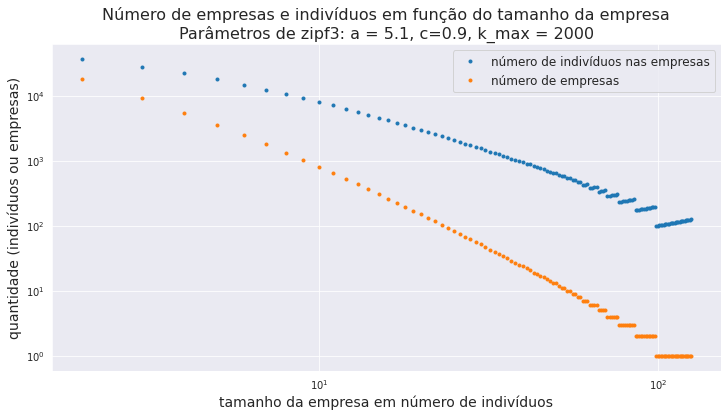

In [125]:
plt.figure(figsize=(12,6))
plt.plot(emp_tam_z3, emp_pop_z3, 'o', ms=3, label='número de indivíduos nas empresas')
plt.plot(emp_tam_z3, emp_num_z3, 'o', ms=3, label='número de empresas')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.xlabel('tamanho da empresa em número de indivíduos', fontsize=14)
plt.ylabel('quantidade (indivíduos ou empresas)', fontsize=14)
plt.title('Número de empresas e indivíduos em função do tamanho da empresa\n'
          + f'Parâmetros de zipf3: a = {z3_a}, c={z3_c}, k_max = {z3_max}', fontsize=16)
plt.show()

In [126]:
wsc = [0, 6, 11, 21, 51, 101]
nwsc = []
for j in range(1,len(wsc)):
    nwsc.append(emp_pop_z3[wsc[j-1]:wsc[j]].sum())
nwsc.append(emp_pop_z3[wsc[j]:].sum())

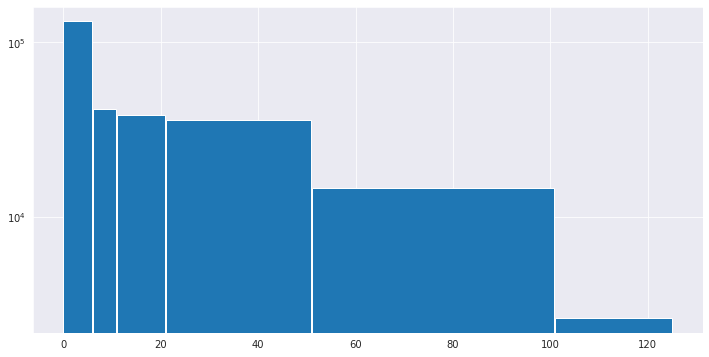

In [127]:
bar_width = [wsc[j] - wsc[j-1] - 0.2 for j in range(1,len(wsc))]
bar_width.append(emp_tam_z3[-1]-wsc[-1])
plt.figure(figsize=(12,6))
plt.bar(wsc, nwsc, bar_width, align='edge')
plt.yscale('log')
plt.show()

In [128]:
def aloca_empresas(pop_por_bloco, emp_num_z3, tam_min):
    """
    Interpolates the population pyramid.

    Population pyramids are usually available in group ages, gathering
    a number of years in each group. This function reads the group ages,
    their population fractions and a maximum desired age and interpolates
    the data to output a pyramid with data for every year.

    The interpolation implemented so far is 'constant' by parts.

    Input:
    ------
        age_groups: list of int
            Each element of the list indicates the first age year in the group.

        age_group_fractions: list of float
            Each element i of the list is expected to be a float
            between 0 and 1, indicating the faction of the population
            in the age group from age_groups[i] to age_groups[i+1], if
            i is not the last index, or from age_groups[i] to age_max,
            if i is the last index

        age_max: int
            The maximum age for the output age pyramid. If not given,
            the maximum age is taken to be the maximum between 100
            and the last age in the list plus the difference between
            the last age and the age before the last one.

        interp: str
            The type of interpolation. Currently, only 'constant' is
            implemented, which is taken as default value, leading
            to a constant by parts interpolation.

    Output:
    -------
        age_fractions: list of float
            Each element age_fractions[i] of the list indicates the
            fraction of the population at age i.
    """

    pop_por_bloco_flat = pop_por_bloco.flatten()
    emp_loc = random.choices(list(range(len(pop_por_bloco_flat))),
                             pop_por_bloco_flat, k=emp_num_z3.sum())

    emp_por_bloco = np.zeros_like(pop_por_bloco)

    emp_bloco_pos = list()
    emp_tam = list()
    k_nivel = 0
    for k in range(len(emp_loc)):
        if k >= emp_num_z3[:k_nivel+1].sum():
            k_nivel += 1
        emp_tam.append(tam_min + k_nivel)
        loc = emp_loc[k]
        emp_bloco_pos.append((loc // 83, loc % 83))
        emp_por_bloco[loc // 83, loc % 83] += 1

    return emp_bloco_pos, emp_por_bloco, emp_tam

In [129]:
%%time
random.seed(1207)
emp_bloco_pos, emp_por_bloco, emp_tam  = aloca_empresas(rio.pop_matrix, emp_num_z3, tam_min)

CPU times: user 218 ms, sys: 60 µs, total: 219 ms
Wall time: 219 ms


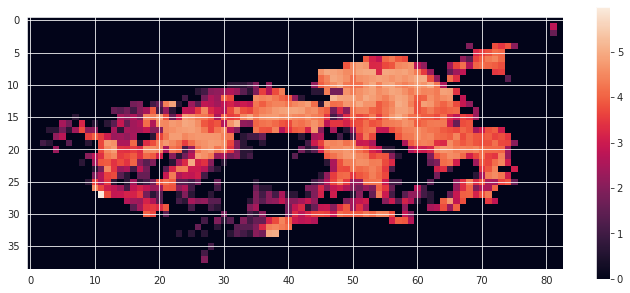

In [130]:
plt.figure(figsize=(12,5))
plt.imshow(np.log(1+ np.array(emp_por_bloco)))
plt.colorbar()

In [131]:
print(f'Total de empresas alocadas: {emp_por_bloco.sum()}')
print(f'Maior concentração de empresas: {emp_por_bloco.max()}')
print(f'(Primeiro) bloco com a maior concentração:')
print(f'({np.argmax(emp_por_bloco) // 83}, {np.argmax(emp_por_bloco) % 83})')

Total de empresas alocadas: 48975
Maior concentração de empresas: 396
(Primeiro) bloco com a maior concentração:
(27, 11)


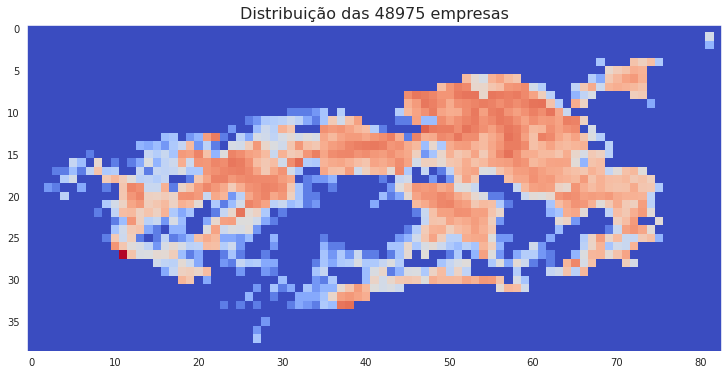

In [132]:
plt.figure(figsize=(15,6))
plt.imshow(np.log(1 + emp_por_bloco), cmap='coolwarm', interpolation='nearest')
#plt.colorbar()
plt.grid(False)
plt.title(f'Distribuição das {emp_por_bloco.sum()} empresas', fontsize=16)
plt.show()

### Distribuição da população economicamente ativa nas empresas

- Agora, para cada empresa, vamos alocar indivíduos de acordo com a distância até ela.

- Vamos fazer isso com uma função "peso", que decai com a distância.

#### Moovit

A reportagem [Moradores do RJ são os que gastam mais tempo em transporte público entre 10 regiões metropolitanas do país](https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/01/15/moradores-do-rj-sao-os-que-gastam-mais-tempo-em-transporte-publico-entre-10-regioes-metropolitanas-do-brasil-mostra-aplicativo.ghtml) menciona uma média de 67 min por viagem, na região metropolitana do Rio de Janeiro. 

O que é mais interessante é a menção ao fato dos dados terem sido obtidos pelo Moovit. Isso significa que os seus dados devem ser, sim, significativos.

Devemos lembrar que, além da distância média, é interessante ajustarmos os dados de deslocamento a alguma distribuição de probabilidades.

É mencionado, pelo menos, que 36% levam entre 1 e 2 horas para chegar ao destino e 11% levam mais de 2 horas.

#### Outras informações

O artigo https://www.anpec.org.br/encontro/2014/submissao/files_I/i10-1dc14346dd67760748fefecaac00a05a.pdf dá bem mais detalhes, inclusive por bairros da cidade, baseado na análise do CENSO de 2010.

Veja, também, https://m.sebrae.com.br/Sebrae/Portal%20Sebrae/UFs/RJ/Menu%20Institucional/SEBRAE_EPG_set13_mob_urb_merc_trab_rj.pdf


### Distribuição por bloco

#### Função "peso"

In [133]:
a, b = np.meshgrid(np.arange(0.5, emp_por_bloco.shape[1]+0.5),np.arange(0.5, emp_por_bloco.shape[0]+0.5))

In [134]:
b.shape

(39, 83)

In [135]:
i = np.arange(0.5, 0.5 + emp_por_bloco.shape[0])
j = np.arange(0.5, 0.5 + emp_por_bloco.shape[1])
jj, ii = np.meshgrid(j,i)
dist =  np.sqrt((jj - 25)**2 + (ii - 15)**2)
a_dist = 5
c_dist = 0.8
f_dist = lambda dist: 1/(1 + (dist/a_dist)**c_dist)

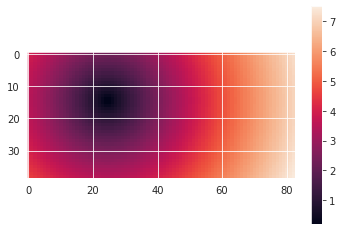

In [136]:
plt.imshow((dist/a_dist)**c_dist)
plt.colorbar()

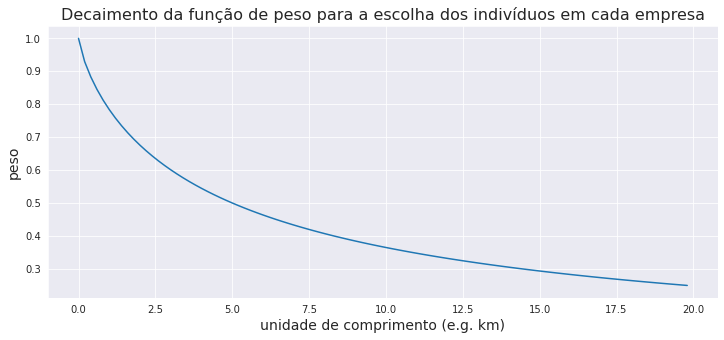

In [137]:
distancias = np.arange(0, 20, 0.2)
f_distancias = f_dist(distancias)
plt.figure(figsize=(12,5))
plt.plot(distancias, f_distancias)
plt.xlabel('unidade de comprimento (e.g. km)', fontsize=14)
plt.ylabel('peso', fontsize=14)
plt.title('Decaimento da função de peso para a escolha dos indivíduos em cada empresa', fontsize=16)
plt.show()

#### Visualização bidimensional do decaimento do peso

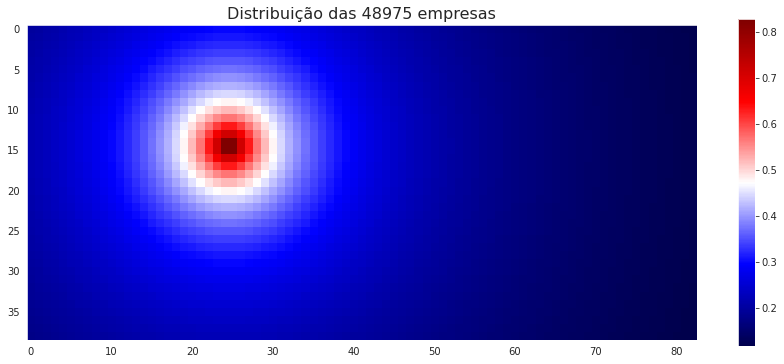

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(f_dist(dist), cmap='seismic', interpolation='none')
plt.colorbar()
plt.grid(False)
plt.title(f'Distribuição das {emp_por_bloco.sum()} empresas', fontsize=16)
plt.show()

#### Peso em conjunto com a população por bloco

In [138]:
k_dist = f_dist(dist) * pop_por_bloco

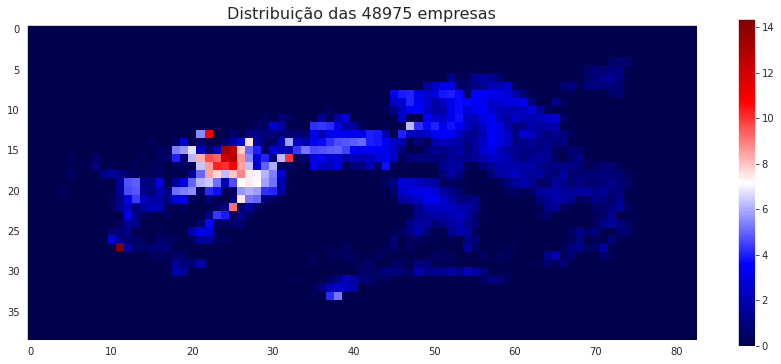

In [139]:
plt.figure(figsize=(15,6))
plt.imshow(k_dist, cmap='seismic', interpolation='none')
plt.colorbar()
plt.grid(False)
plt.title(f'Distribuição das {emp_num_z3.sum()} empresas', fontsize=16)
plt.show()

#### Outros parâmetros

Escolhendo um raio menor e um decaimento mais rápido:

In [140]:
a_dist = 4
c_dist = 12
f_distancias = f_dist(distancias)
k_dist = f_dist(dist) * pop_por_bloco

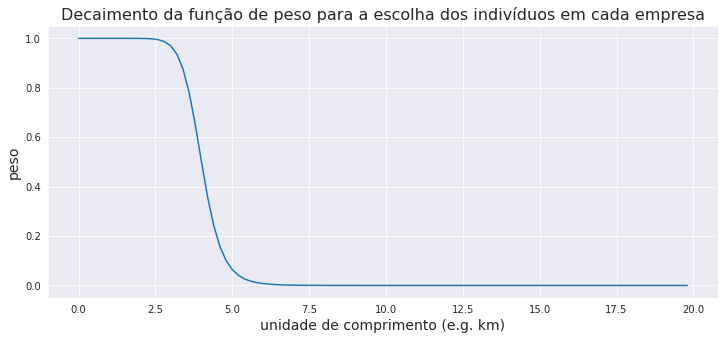

In [141]:
plt.figure(figsize=(12,5))
plt.plot(distancias, f_distancias)
plt.xlabel('unidade de comprimento (e.g. km)', fontsize=14)
plt.ylabel('peso', fontsize=14)
plt.title('Decaimento da função de peso para a escolha dos indivíduos em cada empresa', fontsize=16)
plt.show()

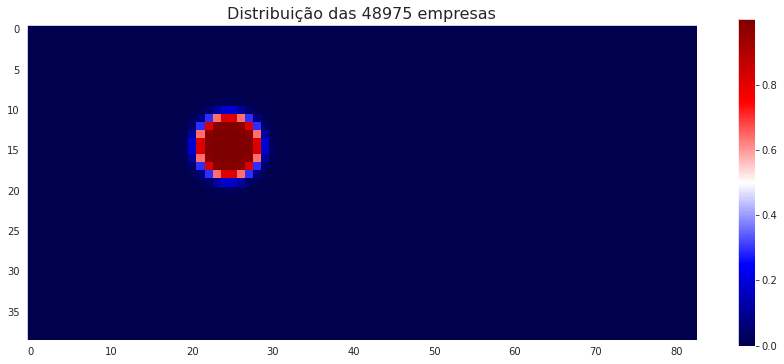

In [142]:
plt.figure(figsize=(15,6))
plt.imshow(f_dist(dist), cmap='seismic', interpolation='none')
plt.colorbar()
plt.grid(False)
plt.title(f'Distribuição das {emp_por_bloco.sum()} empresas', fontsize=16)
plt.show()

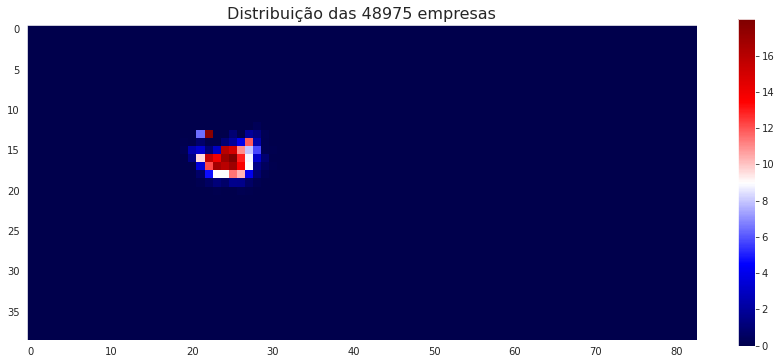

In [143]:
plt.figure(figsize=(15,6))
plt.imshow(k_dist, cmap='seismic', interpolation='none')
plt.colorbar()
plt.grid(False)
plt.title(f'Distribuição das {emp_num_z3.sum()} empresas', fontsize=16)
plt.show()

#### Alocando os blocos onde encontrar indivíduos para cada empresa

- Para cada empresa de tamanho `k`, sorteamos `k` blocos onde encontrar os `k` indivíduos da empresa.

- Pode haver superposição de blocos, de modo que cada empresa pode ter mais de um indivíduo no mesmo bloco.

- Os blocos são escolhidos segundo a distância até a empresa, usando a função de decaimento como peso.

In [144]:
def aloca_emp_membros_blocos(pop_por_bloco, emp_por_bloco, emp_bloco_pos, 
                             tam_min, emp_num_z3, a_dist, c_dist):
    '''
    Aloca os blocos de localização para cada indivíduo de cada empresa.
    '''
    i = np.arange(0.5, 0.5 + emp_por_bloco.shape[0])
    j = np.arange(0.5, 0.5 + emp_por_bloco.shape[1])
    jj, ii = np.meshgrid(j,i)

    emp_membros_blocos = list()

    f_dist = lambda dist: 1/(1 + (dist/a_dist)**c_dist)

    for k in range(len(emp_num_z3)):
        for j in range(emp_num_z3[k]):
            dist =  np.sqrt((jj - emp_bloco_pos[k+j][1])**2 
                            + (ii - emp_bloco_pos[k+j][0])**2)
            k_dist = f_dist(dist)*pop_por_bloco
            emp_membros_blocos.append(
                random.choices(
                    list(range(emp_por_bloco.shape[0]*emp_por_bloco.shape[1])),
                    k_dist.flatten(),
                    k = tam_min + k
                )
            )

    return emp_membros_blocos

In [145]:
a_dist

4

In [146]:
%%time
random.seed(2321)
emp_membros_blocos \
    = aloca_emp_membros_blocos(rio.pop_matrix, emp_por_bloco, emp_bloco_pos, tam_min, emp_num_z3, a_dist, c_dist)

print(f'Número de blocos alocados para os indivíduos: {sum([len(emp_membros_blocos[k]) for k in range(len(emp_membros_blocos))])}')  

Número de blocos alocados para os indivíduos: 264546
CPU times: user 35.1 s, sys: 33.4 ms, total: 35.1 s
Wall time: 35.3 s


In [147]:
len(emp_membros_blocos)

48975

#### Conferindo

In [148]:
print(len(emp_bloco_pos)) # bloco em que cada empresa está localizada
print(len(emp_tam)) # tamanho somado de cada empresa
print(len(emp_membros_blocos)) # localização linear do bloco dos indivíduos de cada empresa

48975
48975
48975


#### Alocando os indivíduos

Agora, escolhemos aleatoriamente os indivíduos para cada empresa, segundo o bloco a que pertencem.

In [149]:
def aloca_emp_individuos(num_pop, pop_idades, pop_blocos_indices, pea_fracoes,
                         emp_pop_z3, emp_tam, emp_membros_blocos):
    '''
    Aloca os indivíduos em cada empresa.
    '''
    
    indices = np.arange(len(pop_idades))
    pop_pia_indices = indices[pop_idades >= 16]    
    
    # Define os pesos de cada individuo segundo a sua idade e os pesos para cada idade
    pesos = pea_fracoes[pop_idades[pop_pia_indices]]
    pesos /= pesos.sum() # probabities must add up to 1
    pop_pia_livres = np.random.choice(pop_pia_indices,
                                      size=emp_pop_z3.sum(),
                                      replace=False,
                                      p=pesos)
    
    # Escolhe aleatoriamete um indivíduo em cada bloco alocado
    emp_membros = list()

    for j in range(len(emp_tam)):
        membros_j = list()
        for l in emp_membros_blocos[j]:
            aux = pop_pia_livres[pop_pia_livres >= pop_blocos_indices[l]]
            candidatos = aux[aux < pop_blocos_indices[l+1]]
            if len(candidatos):
                individuo = random.choice(candidatos)
                membros_j.append(individuo)
                pop_pia_livres = pop_pia_livres[pop_pia_livres != individuo]
        emp_membros.append(membros_j)

    # Alguns blocos podem não ter mais indivíduos economicamente ativos disponíveis
    # então completamos com indivíduos de outros blocos quaisquer, 
    # portanto, sem peso segundo a distância.
    for j in range(len(emp_tam)):
        faltam = emp_tam[j] - len(emp_membros[j])
        if faltam > 0:
            membros_j = list(np.random.choice(pop_pia_livres, size=faltam,
                                              replace=False))
            emp_membros[j] += membros_j
            for individuo in membros_j:
                pop_pia_livres = pop_pia_livres[pop_pia_livres != individuo]
    
    return emp_membros

In [150]:
%%time
emp_membros = aloca_emp_individuos(num_pop, pop_idades, pop_blocos_indices, eap_fractions,
                                   emp_pop_z3, emp_tam, emp_membros_blocos)

CPU times: user 3min 17s, sys: 53.1 ms, total: 3min 17s
Wall time: 3min 18s


In [151]:
ap_num

542254

In [155]:
num_pop_emp = sum([len(emp) for emp in emp_membros])
print(f'População total: {num_pop}')
print(f'População em idade ativa: {ap_num} ({100*ap_num/num_pop:.1f}% da população total)')
print(f'População economicamente ativa: {eap_num} ({100*eap_num/num_pop:.1f}% da população total) ({100*eap_num/ap_num:.1f}% da PIA)')
print(f'Número de pessoas alocadas: {num_pop_emp} ({100*num_pop_emp/num_pop:.1f}% da população total) ({100*num_pop_emp/eap_num:.1f}% da PEA)')

População total: 685426
População em idade ativa: 542254 (79.1% da população total)
População economicamente ativa: 334830 (48.8% da população total) (61.7% da PIA)
Número de pessoas alocadas: 264546 (38.6% da população total) (79.0% da PEA)


### Lista de indivíduos por empresa

O processo abaixo nos gerou a lista `emp_membros`, em que cada membro da lista representa uma empresa e cujo valor é uma outra lista indicando todos os indivíduos alocados nessa empresa.

### Pirâmide da população economicamente ativa

Primeiro juntamos em uma lista os índices de todos os indivíduos alocados em alguma empresa

In [156]:
pop_empresas = []
for emp in emp_membros:
    pop_empresas += emp
print(f'População economicamente ativa: {len(pop_empresas)}')

População economicamente ativa: 264546


#### Visulizando a pirâmide

Agora podemos exibir a pirâmide.

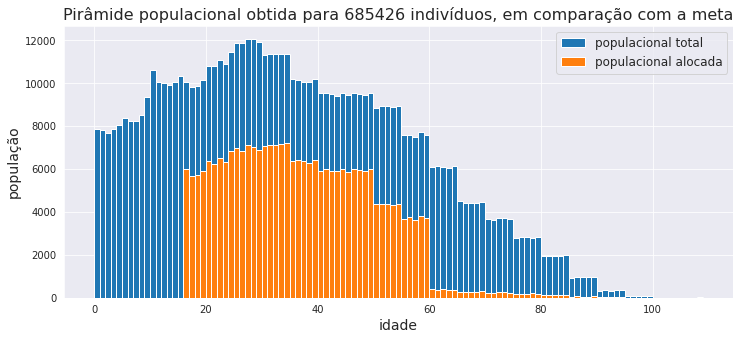

In [160]:
plt.figure(figsize=(12,5))
plt.hist(pop_idades, bins = list(range(109+1)), color='tab:blue',
         label='populacional total')
#plt.hist(pop_idades[pop_pea], bins = list(range(idade_max+1)), color='tab:green',
#         label='populacional economicamente ativa')
plt.hist(pop_idades[pop_empresas], bins = list(range(109+1)), color='tab:orange',
         label='populacional alocada')
plt.xlabel('idade', fontsize=14)
plt.ylabel('população', fontsize=14)
plt.title(f'Pirâmide populacional obtida para {num_pop} indivíduos, em comparação com a meta', fontsize=16)
plt.legend(fontsize=12)
plt.show()

### Gerando o grafo da rede empresarial



In [61]:
%%time
G_e = nx.random_geometric_graph(num_pop, 0, pos=attrib_pos_individuos)

for membros in emp_membros:
    if len(membros) > 1:
        G_e.add_edges_from([(i,j) for i in membros for j in membros if i < j])

CPU times: user 1.07 s, sys: 46.4 ms, total: 1.12 s
Wall time: 1.12 s


### Visualização da rede

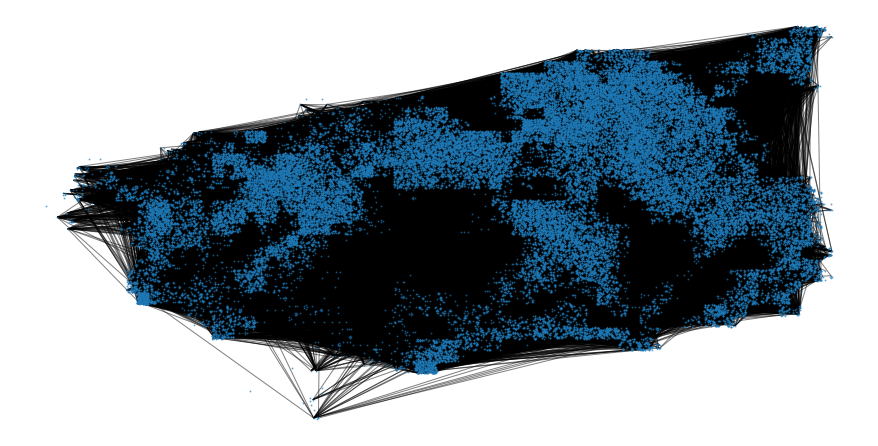

CPU times: user 9.34 s, sys: 73.2 ms, total: 9.41 s
Wall time: 9.48 s


In [62]:
%%time
plt.figure(figsize=(12,6))
nx.draw(G_e, pos=attrib_pos_individuos, node_size=1, alpha=0.5)
plt.show()

In [63]:
%%time
G_e_parte = nx.random_geometric_graph(num_pop, 0, pos=attrib_pos_individuos)

random.seed(2482)
emp_membros_10mais = [membros for membros in emp_membros if len(membros)>10]
emp_membros_parte = random.sample(emp_membros_10mais, 1)
for membros in emp_membros_parte:
    if len(membros) > 1:
        G_e_parte.add_edges_from([(i,j) for i in membros for j in membros if i < j])
for membros in emp_membros_parte:
    print(f'Empresa de tamanho: {len(membros)}')

Empresa de tamanho: 12
CPU times: user 550 ms, sys: 37.3 ms, total: 587 ms
Wall time: 601 ms


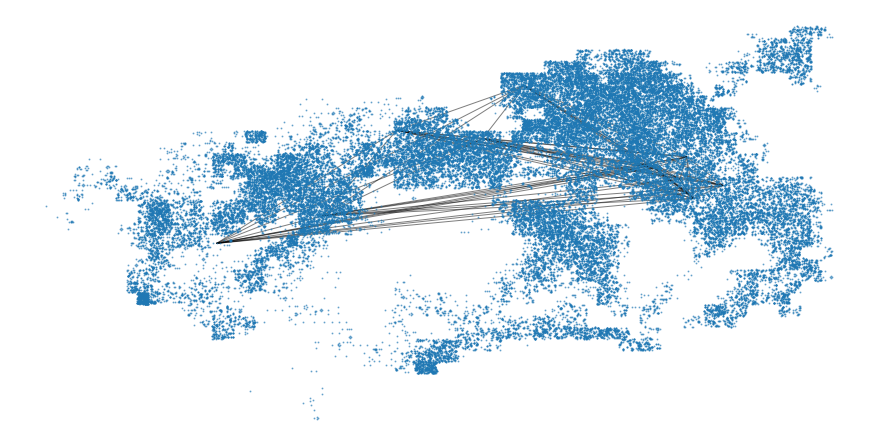

CPU times: user 783 ms, sys: 7.37 ms, total: 791 ms
Wall time: 790 ms


In [64]:
%%time
plt.figure(figsize=(12,6))
nx.draw(G_e_parte, pos=attrib_pos_individuos, node_size=1, alpha=0.5)
plt.show()

## Função de geração das empresas

- As funções acima foram incluídas no pacote de simulação.

- Uma outra função, denominada `gera_empresas()`, foi incluída, com os seguintes argumentos:

    - `pop_por_bloco`,
    
    - `pop_idades`,
    
    - `num_pea`,
    
    - `pea_fracoes`,
    
    - `tam_min`,
    
    - `tam_max`,
    
    - `z3_a`,
    
    - `z3_c`,
    
    - `a_dist`,
    
    - `c_dist`.
    
- Essa função retorna

    - `emp_bloco_pos`,
    
    - `emp_por_bloco`,
    
    - `emp_tam`,
    
    - `emp_membros`

In [65]:
def gera_empresas(pop_por_bloco, pop_idades, pop_blocos_indices,
                  num_pea, pea_fracoes, 
                  tam_min, tam_max, z3_a, z3_c, a_dist, c_dist):
    '''
    Gera as empresas, com as suas localizações e os seus indivíduos.
    '''

    num_pop = len(pop_idades)

    emp_tam_z3, emp_num_z3, emp_pop_z3 \
        = quantifica_empresas_por_tamanho(num_pop, num_pea,
                                          tam_min, tam_max,
                                          z3_a, z3_c)

    emp_bloco_pos, emp_por_bloco, emp_tam \
        = aloca_empresas(pop_por_bloco, emp_num_z3, tam_min)

    emp_membros_blocos \
        = aloca_emp_membros_blocos(pop_por_bloco, emp_por_bloco,
                                   emp_bloco_pos, tam_min, emp_num_z3,
                                   a_dist, c_dist)

    emp_membros = aloca_emp_individuos(num_pop, pop_idades,
                                       pop_blocos_indices,
                                       pea_fracoes,
                                       emp_pop_z3, emp_tam,
                                       emp_membros_blocos)

    return emp_bloco_pos, emp_por_bloco, emp_tam, emp_membros

## Testando com outros parâmetros

### Mesma população, outros parâmetros

In [66]:
tam_min = 3
tam_max = 500
z3_a = 4.5
z3_c = 1.1
a_dist = 3
c_dist = 4

In [67]:
%%time
emp_bloco_pos, emp_por_bloco, emp_tam, emp_membros \
    = gera_empresas(pop_por_bloco, pop_idades,
                    pop_blocos_indices, 
                    num_pea, pea_fracoes,
                    tam_min, tam_max, z3_a, z3_c,
                    a_dist, c_dist)

CPU times: user 6.12 s, sys: 20.7 ms, total: 6.14 s
Wall time: 6.15 s


### Montando o grafo

In [68]:
%%time
G_e = nx.random_geometric_graph(num_pop, 0, pos=attrib_pos_individuos)

for membros in emp_membros:
    if len(membros) > 1:
        G_e.add_edges_from([(i,j) for i in membros for j in membros if i < j])

CPU times: user 826 ms, sys: 35.1 ms, total: 861 ms
Wall time: 863 ms


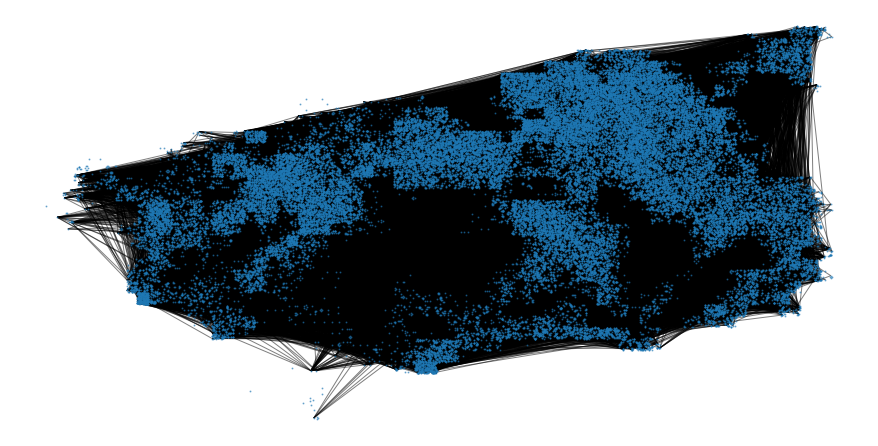

CPU times: user 7.2 s, sys: 61.2 ms, total: 7.26 s
Wall time: 7.35 s


In [69]:
%%time
plt.figure(figsize=(12,6))
nx.draw(G_e, pos=attrib_pos_individuos, node_size=1, alpha=0.5)
plt.show()

### Parte do grafo para exibição

In [70]:
%%time
G_e_parte = nx.random_geometric_graph(num_pop, 0, pos=attrib_pos_individuos)

random.seed(2482)
emp_membros_10mais = [membros for membros in emp_membros if len(membros)>10]
emp_membros_parte = random.sample(emp_membros_10mais, 1)
for membros in emp_membros_parte:
    if len(membros) > 1:
        G_e_parte.add_edges_from([(i,j) for i in membros for j in membros if i < j])
for membros in emp_membros_parte:
    print(f'Empresa de tamanho: {len(membros)}')

Empresa de tamanho: 12
CPU times: user 543 ms, sys: 41.6 ms, total: 584 ms
Wall time: 605 ms


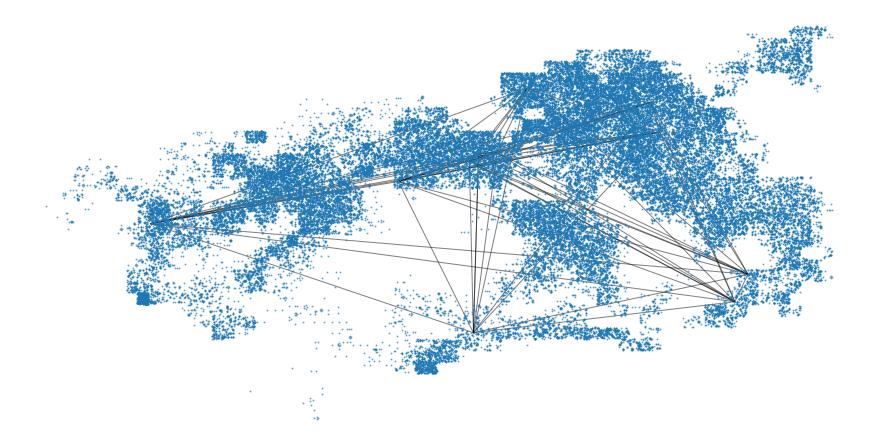

CPU times: user 787 ms, sys: 8.32 ms, total: 796 ms
Wall time: 801 ms


In [71]:
%%time
plt.figure(figsize=(12,6))
nx.draw(G_e_parte, pos=attrib_pos_individuos, node_size=1, alpha=0.5)
plt.show()

## Mudando a população e os parâmetros

Desta vez, começamos do zero, (re)definindo todas as variáveis necessárias.

In [67]:
%%time
landscan_rio = np.load('input/dados_rio/landscan_rio.npy').astype(int)
landscan_rio = np.maximum(landscan_rio, 0)

pop_por_bloco = (landscan_rio/1000).astype(int)
num_pop = pop_por_bloco.sum()

censo_residencial = np.array([.21, .26, .20, .17, .08, .04, .02, .02])
num_tam_res = len(censo_residencial)

# pos_residencias, pos_individuos, res_individuos, pop_blocos_indices \
#     = episiming.scenes.aloca_residencias_e_individuos(pop_por_bloco, censo_residencial)

CPU times: user 2.27 ms, sys: 200 µs, total: 2.47 ms
Wall time: 1.64 ms


In [73]:
%%time
attrib_pos_individuos = {j: pos_individuos[j] for j in range(len(pos_individuos))}

G_r = nx.random_geometric_graph(len(pop_por_bloco), 0, pos=attrib_pos_individuos)

for individuos in res_individuos:
    if len(individuos) > 1:
        G_r.add_edges_from([(i,j) for i in individuos for j in individuos if i < j])

CPU times: user 42.7 ms, sys: 7.71 ms, total: 50.4 ms
Wall time: 49.5 ms


In [74]:
idades_grupos = np.array([0, 5, 10, 14, 18, 20, 25, 30, 40, 50, 60, 65])
idades_fracoes_grupos = np.array([0.047, 0.046, 0.043, 0.049, 0.027, 0.065, 0.067, 0.155, 0.142,
                                  0.140, 0.064, 0.155])
idade_max = 100
idades = np.arange(0,idade_max) # gera idades até < idade_max, devemos considerar se incluímos idade_max

In [75]:
%%time
idades_fracoes = episiming.cenarios.obtem_idades_fracoes(idades_grupos, idades_fracoes_grupos, idade_max)

CPU times: user 77 µs, sys: 1 µs, total: 78 µs
Wall time: 83 µs


In [75]:
%%time
pop_idades = rio.pop_age

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11 µs


In [77]:
num_pea_2010 = np.array([0, 902115, 1448515, 495289, 241619])
pea_fracao = 0.4885
num_pea = int(pea_fracao * num_pop)
pea_idades_faixas = np.array([0, 16, 30, 50, 60])
pea_fracoes_faixas = num_pea_2010/num_pea_2010.sum()

In [78]:
%%time
pea_fracoes = episiming.cenarios.obtem_idades_fracoes(pea_idades_faixas, pea_fracoes_faixas, idade_max=100)

CPU times: user 91 µs, sys: 11 µs, total: 102 µs
Wall time: 129 µs


In [79]:
tam_min = 3
tam_max = 2000
z3_a = 5.2
z3_c = 1.5
a_dist = 4
c_dist = 10

In [73]:
%%time
emp_bloco_pos, emp_por_bloco, emp_tam, emp_membros \
    = episiming.cenarios.gera_empresas(pop_por_bloco, pop_idades,
                                       pop_blocos_indices,
                                       num_pea, pea_fracoes,
                                       tam_min, tam_max, z3_a, z3_c,
                                       a_dist, c_dist)

AttributeError: module 'EpiSiming' has no attribute 'cenarios'

In [81]:
%%time
G_e = nx.random_geometric_graph(num_pop, 0, pos=attrib_pos_individuos)

for membros in emp_membros:
    if len(membros) > 1:
        G_e.add_edges_from([(i,j) for i in membros for j in membros if i < j])

CPU times: user 79 ms, sys: 8.48 ms, total: 87.4 ms
Wall time: 86.5 ms


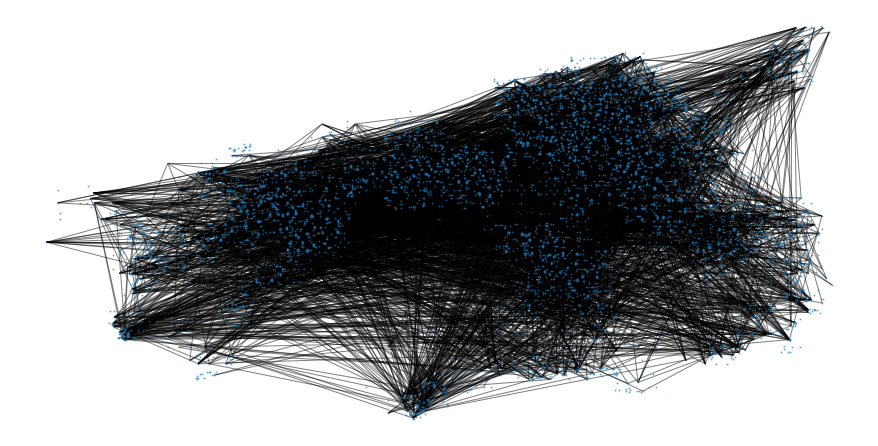

CPU times: user 712 ms, sys: 6.71 ms, total: 719 ms
Wall time: 717 ms


In [82]:
%%time
plt.figure(figsize=(12,6))
nx.draw(G_e, pos=attrib_pos_individuos, node_size=1, alpha=0.5)
plt.show()

## Referências

- [Imperial College COVID-19 Response Team (16/mar/2020), Impact of non-pharmaceutical interventions (NPIs) to reduce COVID- 19 mortality and healthcare demand, 16 de março de 2020. (Free Download)](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf)

- [Ferguson NM, Cummings DAT, Fraser C, Cajka JC, Cooley PC, Burke DS (2006). Strategies for mitigating an influenza pandemic. Nature 442 (7101), 448–52 (Free Download)](https://pubmed.ncbi.nlm.nih.gov/16642006/); veja, também, as [notas suplementares](https://www.nature.com/articles/nature04795#Sec2).

<!--NAVIGATOR-->

---
[<- Construção de cenários: definindo as idades](22.00-Construindo_Cenarios_Distribuicao_Idades.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [O cenário da cidade do Rio de Janeiro: rede escolar ->](24.00-Cenario_Rio_Escolar.ipynb)